## Feature Selection 
#### All managers and Team leaders need to specify the most crucial METRICS which affect the desired OUTPUTS 
- Project Managers need to specify the activities which affect the achedule, Costs of Project
- Marketing and Sales experts need to study the most profitable products , so they could improve their services and expand Customer interests, and experiences.
- HR Managers need to calculate the bonus and promotions of employees according to evaluations in various fields, and find out the most evaluations which affect the final performance , so they would decide clear path and needs of training and motivation system for their employees.

In [1]:
# Import the required Libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.feature_selection import RFE , SelectKBest , mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
import warnings
from sklearn.metrics import mean_absolute_error , mean_squared_error 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import cross_val_score


In [2]:
# Import the data fram of Scores 
file = "C:\\Users\\Mohannad.dawood\\Desktop\\Data_science_Projects\\20scores.csv"
data = pd.read_csv(file)
data.head(2)

,revenue,score0,score1,score2,score3,score4,score5,score6,score7,score8,...,score10,score11,score12,score13,score14,score15,score16,score17,score18,score19
0,30698.74,0.067763,1.762772,0.211119,0.619655,-1.586284,0.051320,-0.529940,-0.177908,-0.387431,...,-1.246132,-1.817742,-0.189583,-1.636507,0.088087,0.481573,2.243539,0.330061,-1.019798,-1.409513
1,46813.75,0.943657,-0.696100,3.503075,1.323145,-0.579567,-1.379598,0.013465,1.061996,-0.952645,...,1.115770,0.455824,0.109667,-0.790210,1.876311,0.610918,0.208647,1.505998,0.671251,0.315013


In [3]:
# Explore the data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  1000 non-null   float64
 1   score0   1000 non-null   float64
 2   score1   1000 non-null   float64
 3   score2   1000 non-null   float64
 4   score3   1000 non-null   float64
 5   score4   1000 non-null   float64
 6   score5   1000 non-null   float64
 7   score6   1000 non-null   float64
 8   score7   1000 non-null   float64
 9   score8   1000 non-null   float64
 10  score9   1000 non-null   float64
 11  score10  1000 non-null   float64
 12  score11  1000 non-null   float64
 13  score12  1000 non-null   float64
 14  score13  1000 non-null   float64
 15  score14  1000 non-null   float64
 16  score15  1000 non-null   float64
 17  score16  1000 non-null   float64
 18  score17  1000 non-null   float64
 19  score18  1000 non-null   float64
 20  score19  1000 non-null   float64
dtypes: float64(21)


,revenue,score0,score1,score2,score3,score4,score5,score6,score7,score8,...,score10,score11,score12,score13,score14,score15,score16,score17,score18,score19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38328.608110,-0.002405,-0.022261,-0.017689,-0.029266,-0.003411,-0.013514,-0.073847,0.047269,0.014404,...,0.016080,0.036946,-0.033559,-0.011065,0.036356,0.003269,0.037816,0.045689,0.025915,-0.009113
std,11149.807854,1.002132,1.025308,1.019673,1.011640,0.987382,0.983125,0.983520,1.005555,1.011987,...,0.969334,0.964260,0.988101,0.988377,0.981858,0.982052,0.980248,1.035412,1.019895,1.023736
min,5000.000000,-3.486830,-3.074388,-3.264010,-3.691173,-3.422566,-3.095880,-2.854746,-3.266140,-3.739275,...,-3.492697,-3.490491,-3.063402,-3.073072,-2.779825,-3.501281,-2.879816,-3.838383,-3.269610,-3.460694
25%,30540.112500,-0.683637,-0.722261,-0.724904,-0.623175,-0.618828,-0.662549,-0.727337,-0.617502,-0.664168,...,-0.644548,-0.659998,-0.710283,-0.695974,-0.617948,-0.677383,-0.618049,-0.608872,-0.683420,-0.709664
50%,38251.365000,-0.028737,-0.018156,0.012334,-0.014029,-0.001813,0.018156,-0.067713,0.015698,0.018834,...,0.031077,0.051283,-0.056222,-0.017046,0.049337,-0.034759,0.025519,0.055483,0.051651,0.030671
75%,45818.077500,0.663074,0.645662,0.715932,0.626162,0.708016,0.679162,0.568328,0.685917,0.712127,...,0.660604,0.670339,0.666642,0.664675,0.696360,0.681202,0.684131,0.707971,0.682873,0.685701
max,87975.820000,3.947639,3.075013,3.503075,2.415127,3.341008,2.622040,3.037349,2.807213,3.443939,...,3.274786,3.061266,4.091684,2.983983,3.168349,3.404598,2.961147,4.018649,2.985441,4.150989


- Data has 1000 ( Projects, Products , Employees or even Customers ) it is up the usage of the data and the registered scores in the data.
- no missing values 
- values of targets and scores have different ranges of scale , so they need to be scales by preprocessing library.
- Data have 20 scores refelcting ( Costs, Evaluations , or any other rate)
- Our Goal id determining the most crucial scores which affect the target ( Revenue ), and forecast the required changes to improve the results in the Markets, Projects, or even job promotion system and employees performance.

In [4]:
# define the training and target data 

train = data.iloc[:,1:]
target = data['revenue']

In [5]:
# Scale the training data 

scale = StandardScaler()
train_scale = scale.fit_transform(train)

In [6]:
# define the model of selection Random Forest with depth of 5 

random = RandomForestRegressor(n_estimators=5, random_state=111)

In [24]:
# define the selector mothod RFE according to the defined model Random Forest Regressor 

score_list =[]
feature_count = []
for k in range (1,21):
    selector = RFE(estimator=random , n_features_to_select= k )
    selector.fit(train_scale , target)
    train_select = selector.transform(train_scale)
    metrics= cross_val_score( random, train_select, target, cv=10 , scoring='neg_mean_absolute_error')
    metrics_score = round (-1 * metrics.mean() , 1 )
    score_list.append(metrics_score)
    feature_count.append(k)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


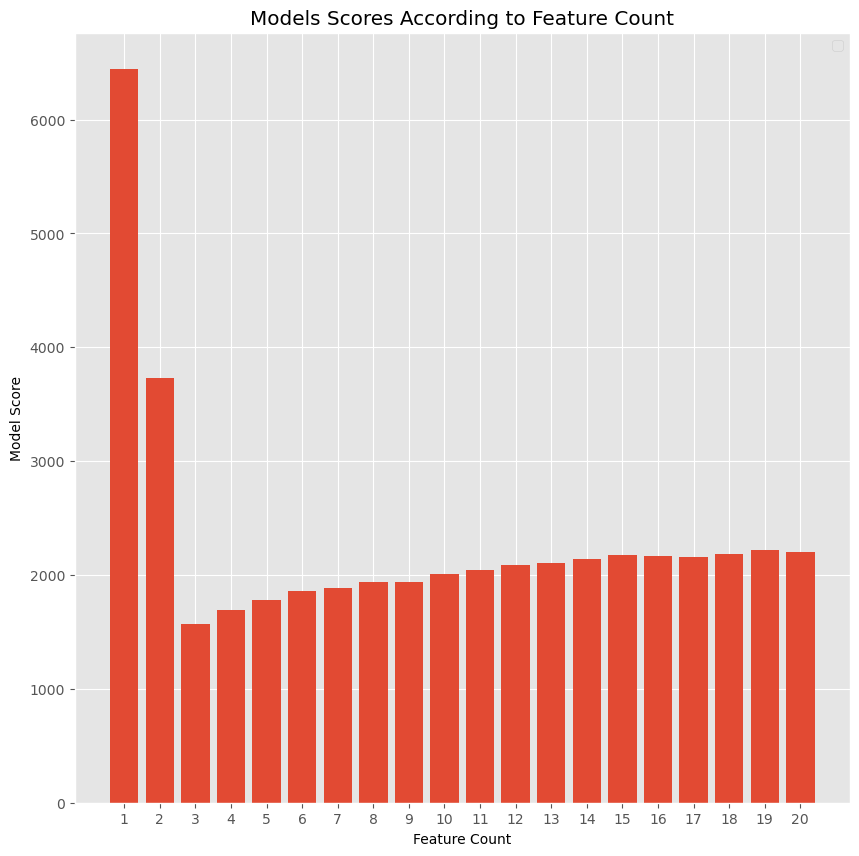

In [25]:
plot_df =pd.DataFrame( {'Feautue_ count': feature_count , 'Model_score': score_list})
plot_df
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,10))
plt.bar (plot_df['Feautue_ count'], plot_df['Model_score'])
plt.title ('Models Scores According to Feature Count')
plt.xlabel('Feature Count')
plt.ylabel ('Model Score')
plt.xticks(range(1,21))
plt.legend()
plt.show()

In [26]:
best_score = plot_df['Model_score'].min()
Best_feature_count = plot_df['Feautue_ count'][plot_df['Model_score']== best_score].values
print ( f'Our Model best score is' ,best_score, 'occured for' , Best_feature_count , 'features') 

Our Model best score is 1568.539 occured for [3] features


- Our Model best score is 1568.539 occured for [3] features
- To findout the three best features which could affect our target ( Revenue), we are going to fit the model for 3 k features of the selector RFE

In [28]:
selector = RFE(estimator=random , n_features_to_select= 3 )
selector.fit(train_scale , target)
train_select = selector.transform(train_scale)
metrics= cross_val_score( random, train_select, target, cv=10 , scoring='neg_mean_absolute_error')
metrics_score = round (-1 * metrics.mean() , 1 )
metrics_score

1568.5

In [41]:
mask = selector.support_
best_features = train.columns[mask]
best_features

Index(['score12', 'score17', 'score19'], dtype='object')

- Our Best features which could obtained score of our regression model are (score12, score17 , score19 )
- Now we focuse to improve the scores of these features to get best results
- we could concentrate on specific targets of these three scores to forecast the desired outcomes.